In [ ]:
!pip install statsmodels

     |████████████████████████████████| 9.8 MB 28.3 MB/s 
     |████████████████████████████████| 233 kB 79.2 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
!pip install scikit-image

     |████████████████████████████████| 13.5 MB 28.4 MB/s 
     |████████████████████████████████| 3.3 MB 60.4 MB/s 
     |████████████████████████████████| 178 kB 80.9 MB/s 
     |████████████████████████████████| 1.9 MB 72.0 MB/s 
     |████████████████████████████████| 6.4 MB 61.4 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd
import Config
import skimage.io as sk
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import numpy as np 
from statsmodels.robust import mad
from PIL import Image 

## Reading images

#### Making a dataframe from features.csv to get the files id's

In [ ]:
img_features_df = pd.read_csv(Config.features_path)
#img_features_df = img_features_df.drop(['area', 'perimeter'], axis=1) #we only need the id
mel_df = pd.read_csv(Config.example_ground_truth_path)

img_features_df['melanoma'] = mel_df['melanoma']
print(img_features_df[img_features_df['melanoma'] == 1]) #getting the images that show cancer lesions

               id        area  perimeter  melanoma
25   ISIC_0012099     88455.0     1353.0       1.0
30   ISIC_0012151   1558295.0     5920.0       1.0
42   ISIC_0012288    361677.0     2885.0       1.0
51   ISIC_0012434    225711.0     2110.0       1.0
73   ISIC_0013232    467956.0     3501.0       1.0
75   ISIC_0013491    398097.0     2921.0       1.0
76   ISIC_0013501    809661.0     3059.0       1.0
77   ISIC_0013518   4680699.0    12142.0       1.0
79   ISIC_0013549    907406.0     3102.0       1.0
84   ISIC_0013644   1102493.0     3545.0       1.0
85   ISIC_0013651   4205941.0     6906.0       1.0
86   ISIC_0013663   2268716.0     8854.0       1.0
87   ISIC_0013702   1781222.0     4594.0       1.0
88   ISIC_0013736   1376523.0     5495.0       1.0
90   ISIC_0013828   1907682.0     5824.0       1.0
94   ISIC_0014037   3710908.0     7149.0       1.0
102  ISIC_0014217   4336071.0    11204.0       1.0
103  ISIC_0014302    579716.0     3900.0       1.0
106  ISIC_0014428    525860.0  

#### Main function that check's each image color

In [ ]:
im = plt.imread('../data/example_image/ISIC_0001769.jpg')
mask=plt.imread('../data/example_segmentation/ISIC_0001769_segmentation.png')

def check_variability2(img1, img2, id):
    #with paste we are cutting the original image using the segmentation as a mask
    img1[img2==0] = 0
    
    #we then calculate the mad of each dimension 
    r, g, b = img1[:,:,0], img1[:,:,1], img1[:,:,2]
    mad_r= mad(r[np.where(r != 0)])
    mad_g= mad(g[np.where(g != 0)])
    mad_b= mad(b[np.where(b != 0)])
    mad_result= [mad_r,mad_g,mad_b]

    #now we cal
    return np.mean(mad_result)


### Function that takes a score out of the variability function 
##### input check_variablity2 output: 0, 1, 2

74.13011092528009


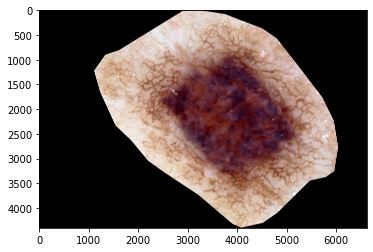

In [ ]:
def score_variability():
    if check_variability2(img1, img2, id) < 20: 
        return 0 
    elif check_variability2(img1, img2, id) < 50: 
        return 1
    else: 
        return 2
im = plt.imread('../data/example_image/ISIC_0015211.jpg')
mask=plt.imread('../data/example_segmentation/ISIC_0015211_segmentation.png')

print(check_variability2(im,mask,0))
score_variability(im, mask, 0)
plt.imshow(im)

### Looping through the chosen range of images and applying check_variability()

In [ ]:
#M,N is the range of images that we choosen (finally it will be 0-# of images)
M = 0
N = 150

#fig, ax = plt.subplots(N-M, 1, figsize=(N-M, 2*(N-M)))
#fig.tight_layout()

mad_lst = []



#the main for loop which loads the images
for (index, id) in enumerate(img_features_df['id'][M:N]):
    img = plt.imread(f'../data/example_image/{id}.jpg') #main image
    img_bw = plt.imread(f'../data/example_segmentation/{id}_segmentation.png') #main image grayed

    title = f"{id}: {img_features_df[img_features_df['id'] == id]['melanoma'].iloc[0]}"
    is_mel = img_features_df[img_features_df['id'] == id]['melanoma'].iloc[0]

    # Show the images overlayed, for this we can use PIL 

    # Load images as Image objects  
    #img = Image.open(f'../data/example_image/{id}.jpg') 
    #img_bw = Image.open(f'../data/example_segmentation/{id}_segmentation.png') 

   # area = img_features_df[img_features_df['id'] == id]['perimeter'].iloc[0]

    mad_lst.append((check_variability2(img,img_bw,id), is_mel, id))    

<AxesSubplot:>

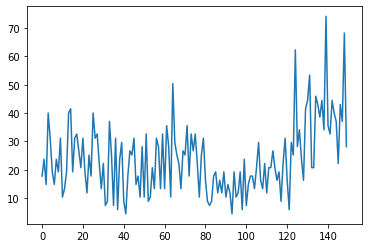

In [ ]:

mad_data= pd.DataFrame(mad_lst, columns=['mad','melanoma', 'id'])

mad_data['mad'].plot()




In [ ]:
from scipy.stats import pearsonr, spearmanr

mad_data['mad'] = mad_data['mad']
print(spearmanr(mad_data['melanoma'], mad_data['mad']))

SpearmanrResult(correlation=0.04777410252433719, pvalue=0.561545269277163)


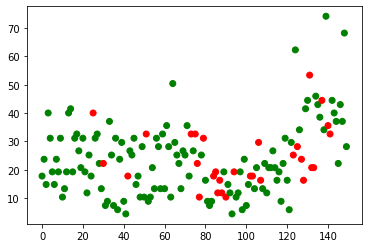

In [ ]:
colors = ["green" if img_features_df['melanoma'][x] == 0.0 else 'red' for x in range(len(img_features_df['melanoma'])) ]
plt.scatter([x for x in range(len(mad_data['mad']))], mad_data['mad'], c=colors)

In [ ]:
mad_data

,mad,melanoma,id
0,17.791227,0.0,ISIC_0001769
1,23.721635,0.0,ISIC_0001852
2,14.826022,0.0,ISIC_0001871
3,40.030260,0.0,ISIC_0003462
4,31.134647,0.0,ISIC_0003539
...,...,...,...
145,22.239033,0.0,ISIC_0015443
146,42.995464,0.0,ISIC_0015445
147,37.065055,0.0,ISIC_0015483
148,68.199702,0.0,ISIC_0015496


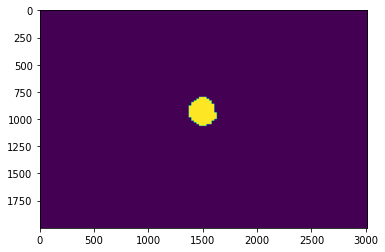

In [ ]:
img = Image.open(f'../data/example_image/ISIC_0012965.jpg') 
img_bw = Image.open(f'../data/example_segmentation/ISIC_0012965_segmentation.png') 
plt.imshow(img_bw)

In [ ]:
im = plt.imread('../data/example_image/ISIC_0013793.jpg')
mask=plt.imread('../data/example_segmentation/ISIC_0013793_segmentation.png')
img1 = im.copy()
img1[mask==0] = 0
  
# Display 
#plt.imshow(img1)
#plt.imshow(mask)

print(img1)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [ ]:
img_features_df

,id,area,perimeter,melanoma
0,ISIC_0001769,216160.0,2013.0,0.0
1,ISIC_0001852,130493.0,1372.0,0.0
2,ISIC_0001871,205116.0,1720.0,0.0
3,ISIC_0003462,161705.0,1344.0,0.0
4,ISIC_0003539,317040.0,2063.0,0.0
...,...,...,...,...
145,ISIC_0015443,9732988.0,13775.0,0.0
146,ISIC_0015445,12049938.0,19517.0,0.0
147,ISIC_0015483,8856478.0,13813.0,0.0
148,ISIC_0015496,8951522.0,13742.0,0.0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=932aa97b-f6d2-4889-8f04-d6166675cc2f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>